# 1D convolutions


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import linalg
import time

Consider the square wave discrete signal:

$$
\mathbf{v}_i=
\begin{cases}
0, & i = 1,\dots, 50 \\
1, & i = 51,\dots, 75 \\
0, & i = 76,\dots, 100 \\
\end{cases}
$$

Define the vector $\mathbf{v}$ and plot the corresponding signal.


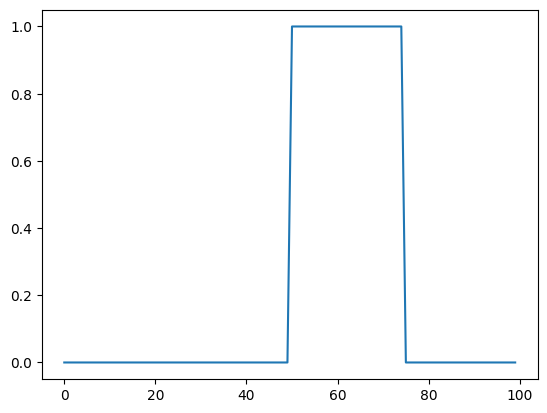

In [3]:
v = np.zeros(100)
v[50:75]=1

plt.plot(v)

Consider the following kernels $\mathbf{k}$:


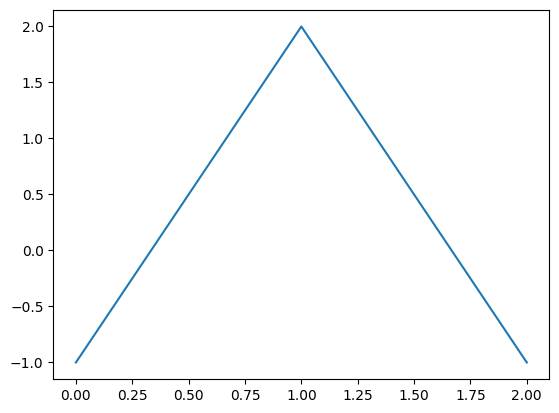

In [17]:
### first kernel
# k = np.ones(10) / 10

### second kernel
# k = signal.gaussian(20, std=3)
# k = k / np.sum(k)

### third kernel
k = np.array([-1,2,-1])

plt.plot(k)

In what follows, we will compute the convolution between $\mathbf{v}$ and $\mathbf{k}$ in 4 different manners. At the end of each point, plot the obtained filtered (i.e. convolved) signal.


## 1. Toeplitz matrix

Define a Toeplitz matrix $K$ associated with the kernel $\mathbf{k}$.
Then, compute the convolution between $\mathbf{k}$ and $\mathbf{v}$, exploiting the property:

$\mathbf{k} * \mathbf{v} = K \mathbf{v}$


Elapsed V1: 1.0004e-03


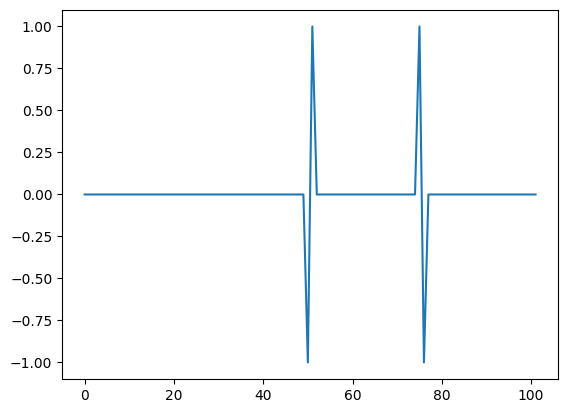

In [18]:
k_padded = np.zeros(len(v) + len(k) - 1)
k_padded[:len(k)] = k

t0 = time.time()
K = linalg.toeplitz(k_padded, np.zeros(len(v)))
conv_v1 = K @ v
dt = time.time() - t0
print(f"Elapsed V1: {dt:.4e}")
plt.plot(conv_v1)

## 2. Direct definition (sums of products)

The convolution without "boundary layer" (i.e. the part of the vector which is identical between the standard and the circular convolutions), is given by:

$(\mathbf{k} * \mathbf{v})_i = \sum_{j = 0}^{n_k - 1} \mathbf{k}_{n_k - j} \mathbf{v}_{i + j}$

for $i = 1, \dots, n_v - n_k + 1$.


1734096040.7489572
1734096040.751961
Elapsed V2: 3.0038e-03


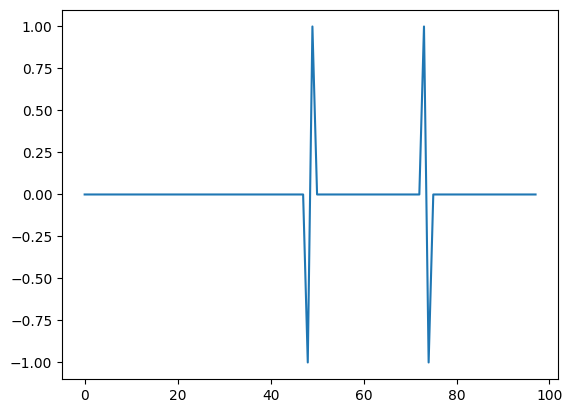

In [19]:
l_out = len(v) - len(k) + 1
conv_v2 = np.zeros(l_out)
t0 = time.time()
print(t0)
for i in range(l_out):
    # for j in range(0, len(k)):
        # conv_v2[i] += k[-j] * v[i+j]
    # conv_v2[i] = np.sum(np.flip(k) * v[i : i + len(k)])
    conv_v2[i] = np.sum(k[::-1] * v[i : i + len(k)])
print(time.time())
dt = time.time() - t0
print(f"Elapsed V2: {dt:.4e}")

plt.plot(conv_v2) 



## 3. Convolution through DFT

When the two signals have the same size, we have:

$ \widehat{\mathbf{v} \circledast \mathbf{k}} = \widehat{\mathbf{v}} \odot \widehat{\mathbf{k}} $

Where:

- $\hat{\mathbf{a}}$ is the DFT of the signal $\mathbf{a}$
- $\circledast$ is the circular convolution
- $\odot$ is the Hadamard product

When the two signals do not have the same size, the above formula can be applied simply by "zero-padding" the shorter signal (N.B: this is automatically done by the `numpy.fft.fft` command by passing the required length as second argument).

Besides the filtered signal, plot the DFT of the two signals and of their convolution.


Elapsed time 0.000e+00


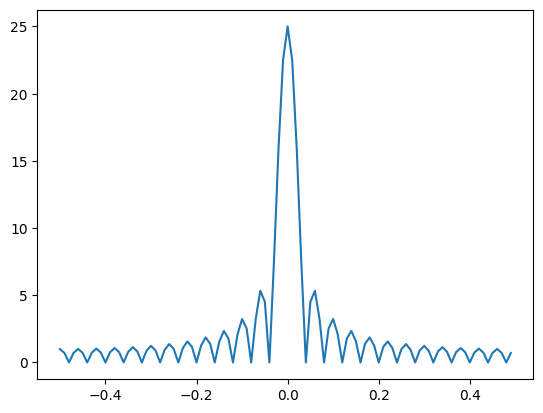

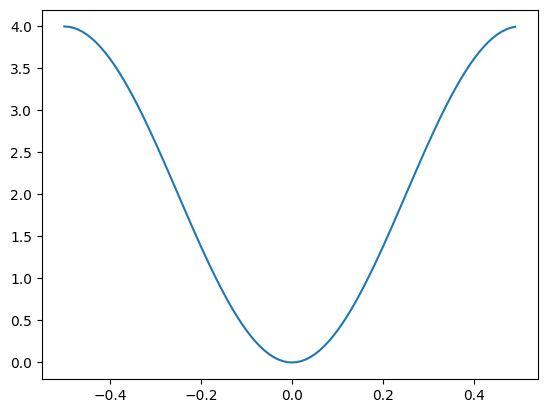

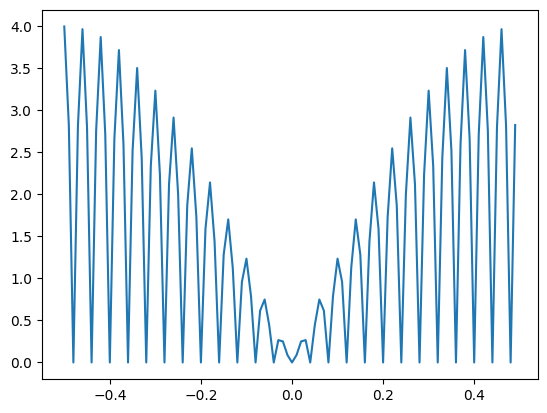

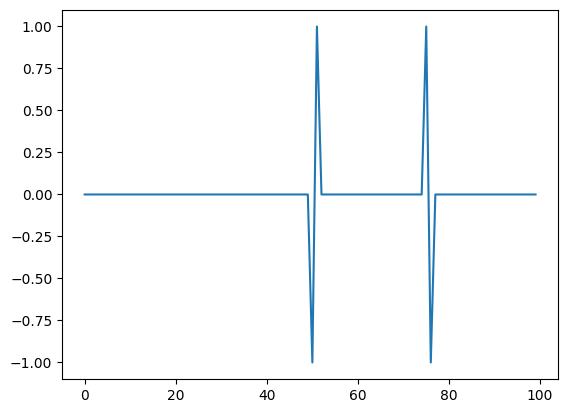

In [28]:
import numpy as np

t0 = time.time()
v_fft = np.fft.fft(v)
k_fft = np.fft.fft(k, len(v))
vk_fft = v_fft * k_fft

conv_v3 = np.real(np.fft.ifft(vk_fft))

dt = time.time() - t0
print(f"Elapsed time {dt:.3e}")

freq = np.fft.fftfreq(len(v))

plt.figure()
plt.plot(np.fft.fftshift(freq), np.fft.fftshift(np.absolute(v_fft)))
plt.figure()
plt.plot(np.fft.fftshift(freq), np.fft.fftshift(np.absolute(k_fft)))
plt.figure()
plt.plot(np.fft.fftshift(freq), np.fft.fftshift(np.absolute(vk_fft)))
plt.figure()
plt.plot(conv_v3)

## 4. Using the command `scipy.signal.convolve`

Check out the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html).


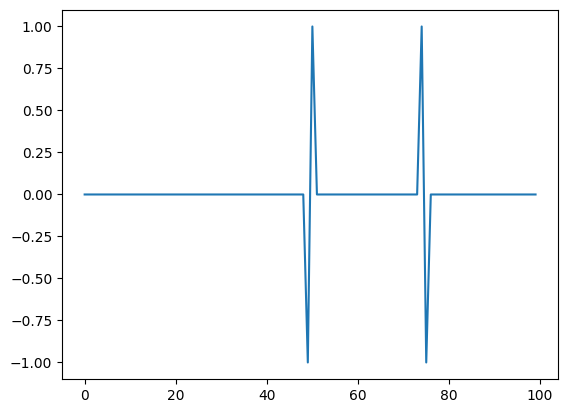

: 

In [ ]:
v_conv = signal.convolve(v,k, mode = "same")
plt.plot(v_conv)